### 공공데이터 포털
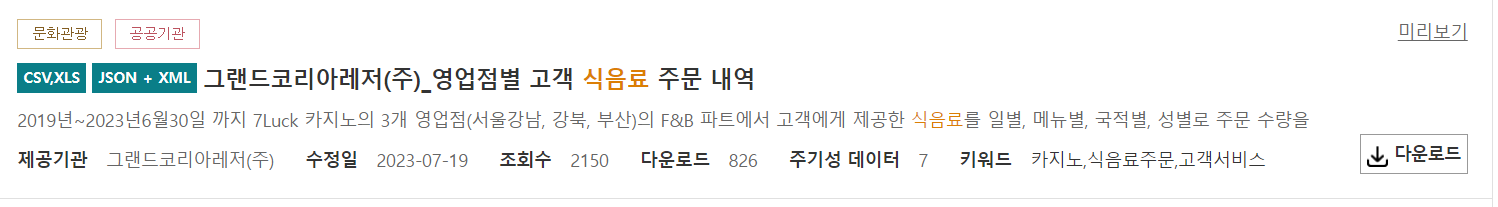

1. 데이터 불러오기
2. 자료셋 샘플확인

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\bluecom014\Desktop\data\csv 파일\그랜드코리아레저(주)_영업점별 고객 식음료 주문 내역_20230630.csv")
df.head()

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31


3. 데이터셋의 정보확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545008 entries, 0 to 1545007
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   지급일자        1545008 non-null  object
 1   영업점코드       1545008 non-null  object
 2   영업점명        1545008 non-null  object
 3   식음메뉴그룹코드    1545008 non-null  int64 
 4   식음메뉴그룹명     1545008 non-null  object
 5   식음메뉴코드      1545008 non-null  int64 
 6   식음메뉴명(한글)   1545008 non-null  object
 7   식음메뉴명(영문)   603104 non-null   object
 8   성별          1355792 non-null  object
 9   고객여권발급국가코드  1355826 non-null  object
 10  고객여권발급국가명   1355684 non-null  object
 11  주문수량        1545008 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 141.4+ MB


4. 결측여부 확인

In [5]:
df.isnull().sum()

지급일자               0
영업점코드              0
영업점명               0
식음메뉴그룹코드           0
식음메뉴그룹명            0
식음메뉴코드             0
식음메뉴명(한글)          0
식음메뉴명(영문)     941904
성별            189216
고객여권발급국가코드    189182
고객여권발급국가명     189324
주문수량               0
dtype: int64

5. 결측치 시각화

<Axes: >

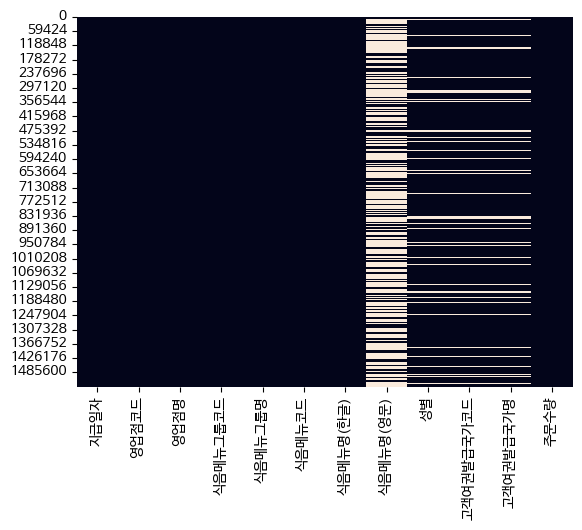

In [6]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

6. 결측치 중 성별 필드 처리. 최빈값으로 채우기

In [7]:
gender=df['성별'].value_counts()
gender

성별
M    1017112
F     338680
Name: count, dtype: int64

In [8]:
df['성별']=df['성별'].fillna(gender.idxmax())
df.isnull().sum()

지급일자               0
영업점코드              0
영업점명               0
식음메뉴그룹코드           0
식음메뉴그룹명            0
식음메뉴코드             0
식음메뉴명(한글)          0
식음메뉴명(영문)     941904
성별                 0
고객여권발급국가코드    189182
고객여권발급국가명     189324
주문수량               0
dtype: int64

7. 주문수량 상위 10개 보기

In [9]:
df_sort = df.sort_values(by='주문수량',ascending=False)
df_sort.head(10)

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
1446287,2023-01-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2911
1202737,2022-12-20,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
1008673,2022-12-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
647787,2023-01-03,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2881
1447299,2023-01-17,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
1105883,2022-11-16,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
83794,2020-08-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2593
1440888,2022-07-06,CX,코엑스,2011,음료,2057,펩시콜라,NaN,M,NaN,NaN,2560
1440729,2022-01-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2441
644530,2021-12-22,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2436


8. value_counts 이용하여 데이터 셋 집계하기

8-1. 영업점명 이용 고객수

In [10]:
df['영업점명'].value_counts()

영업점명
코엑스    610732
드래곤    532755
롯데     401521
Name: count, dtype: int64

8-2. 식음메뉴명(한글)별 이용 고객수

In [11]:
df['식음메뉴명(한글)'].value_counts()

식음메뉴명(한글)
계절과일(VIP)                         33083
생맥주                               25995
펩시콜라                              16658
흑후추스테이크                           13740
미에로화이바                            13459
                                  ...  
문배술                                   1
베이컨토마토샌드위치                            1
잔치국수                                  1
GOLD EVENT 메비우스스카이블루6MG(4500원)        1
GOLD EVENT 히츠 퍼플라벨(4500원)             1
Name: count, Length: 1101, dtype: int64

8-3. 성별별 고객수

In [12]:
df['성별'].value_counts()

성별
M    1206328
F     338680
Name: count, dtype: int64

8-4. 고객여권발급국가명 별 이용 고객수

In [13]:
df['고객여권발급국가명'].value_counts()

고객여권발급국가명
중국            346182
일본            173569
미국            165226
대한민국(영주권자)    158386
대만            119346
               ...  
볼리비아               2
마케도니아 공화국          1
체코공화국              1
슬로바키아              1
슬로베이아              1
Name: count, Length: 106, dtype: int64

9. groupby를 이용하여 주문수량 집계하기

9-1. 영업점 별 주문수량 합, 평균

In [14]:
df1 = df.loc[:,['영업점명','주문수량']]
df1.groupby('영업점명').agg(['sum','mean'])

주문수량           
          sum       mean
영업점명                    
드래곤   5489744  10.304444
롯데    2020134   5.031204
코엑스   5067045   8.296675

9-2. 식음메뉴명(한글)별 주문수량 합

In [15]:
df2 = df.loc[:,['식음메뉴명(한글)','주문수량']]
df2.groupby('식음메뉴명(한글)').sum()

,주문수량
식음메뉴명(한글),
(1인분),8818
(BAR),84
(NO ICE),1406
(NO SUGAR),3972
(더블),623
...,...
히츠 엠버라벨(아이코스),4094
히츠 퍼플라벨(아이코스),13548
히츠그린,88


9-3. 고객여권발급국가별 주문수량 합

In [16]:
df3 = df.loc[:,['고객여권발급국가명','주문수량']]
df3.groupby('고객여권발급국가명').sum()

,주문수량
고객여권발급국가명,
그레나다,14
그리스,10
나이지리아,25
남아프리카 공화국,77
네덜란드,3626
...,...
핀랜드,11
필리핀,27737
헝가리,27


9-4. 영업점별 고객여권발급국가별 주문수량 합

In [17]:
df4 = df.loc[:,['영업점명','고객여권발급국가명','주문수량']]
df4
df4.groupby(['고객여권발급국가명', '영업점명']).sum()

주문수량
고객여권발급국가명 영업점명       
그레나다      드래곤       6
          코엑스       8
그리스       드래곤       4
          롯데        6
나이지리아     드래곤      15
...               ...
호주        롯데     1682
          코엑스   31386
홍콩        드래곤     470
          롯데     1040
          코엑스    8255

[251 rows x 1 columns]

10. 지급일자를 date형식으로 변경하여 년, 월, 요일 추가하기

In [18]:
df['지급일자'] = pd.to_datetime(df['지급일자'])
df['년'] = df['지급일자'].dt.year
df['월'] = df['지급일자'].dt.month
df['일'] = df['지급일자'].dt.day
df.head()

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량,년,월,일
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47,2019,3,25
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3,2019,3,5
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7,2019,3,5
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1,2019,2,24
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31,2019,3,16


11. 식음메뉴명은(한글)은 모든 자료가 있지만, 식음메뉴명은(영문)은 결측치가 많음. 이때 어떻게 식음메뉴명(영문)을 한글메뉴명을 이용하여 채울것인가

In [39]:
df['식음메뉴명(영문)'].fillna(df['식음메뉴명(한글)'], inplace=True)
df

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량,년,월,일
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47,2019,3,25
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,아이스티,M,JPN,일본,3,2019,3,5
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7,2019,3,5
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,페리에워터,F,CHN,중국,1,2019,2,24
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31,2019,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545003,2023-06-01,LT,롯데,2011,음료,2212,생강차,생강차,M,CHN,중국,1,2023,6,1
1545004,2023-06-02,LT,롯데,9001,기타,1028,계절과일(VIP),Seasonal Fresh Fruits,M,TWN,대만,1,2023,6,2
1545005,2023-05-20,LT,롯데,9001,기타,9002,물수건(COLD)VIP,물수건(COLD)VIP,M,NaN,NaN,1,2023,5,20
1545006,2023-06-07,CX,코엑스,2012,커피,2124,카페오레(카페라떼),카페오레(카페라떼),M,KOR,대한민국(영주권자),1,2023,6,7
